In [114]:
import os
os.environ['USE_PYGEOS'] = '0'
import glob
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import scripts.utils as utils
plot_kwargs = {'bbox_inches': "tight", 'dpi': 200}

def subset_column(df, column, value):
    df = df[df[column] == value]
    df = df.drop(columns=[column])
    return df

config = utils.load_config("scripts")
tempdir = config['paths']['tempdir']
indir = config['paths']['resultsdir']
outdir = config['paths']['resultsdir']
figdir = config['paths']['figdir']

VAR = 'prbc' # ['ep', 'prbc']

In [115]:
corrs = pd.read_csv(os.path.join(indir, "correlations.csv"))
corrs = subset_column(corrs, 'Variable', VAR)
corrs = subset_column(corrs, 'buffer', 500)

corrs.head()

,scenario,RZ_ID,backcast,indicator,r,p,n_events
1300,bs,1,3,Value,0.942359,0.000000e+00,823
1301,bs,1,3,anomaly_mean,-0.204158,3.414289e-09,823
1302,bs,1,3,anomaly_q50,0.084837,1.491211e-02,823
1303,bs,1,3,deficit_mean,-0.824100,7.420067e-205,823
1304,bs,1,3,deficit_q50,-0.809945,1.938407e-192,823


In [116]:
titles = {'Value': f'Total {VAR.upper()}',
         'anomaly_mean': 'Mean anomaly',
         'anomaly_q50': 'Q50 anomaly',
         'deficit_mean': 'Mean deficit',
         'deficit_q50': 'Q50 deficit',
         'deficit_q75': 'Q75 deficit',
         'deficit_q90': 'Q90 deficit',
         'si12': 'SI12',
         'si24': 'SI24',
         'si6': 'SI6'
        }

/var/folders/7w/k72v6f5x25gblsqmh6bxd3j40000gn/T/ipykernel_54761/4221863847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrs_sub['scenario'] = corrs_sub['scenario'].apply(lambda x: x.upper())
/var/folders/7w/k72v6f5x25gblsqmh6bxd3j40000gn/T/ipykernel_54761/4221863847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrs_sub['scenario'] = corrs_sub['scenario'].apply(lambda x: x.upper())
/var/folders/7w/k72v6f5x25gblsqmh6bxd3j40000gn/T/ipykernel_54761/4221863847.py:5: SettingWithCopyWarning: 
A v

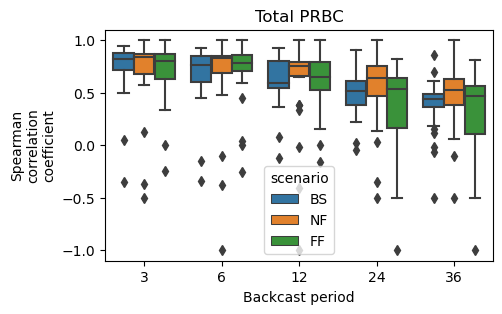

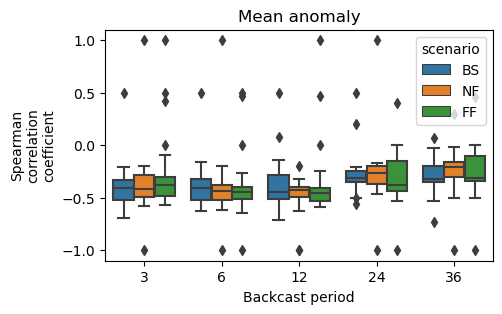

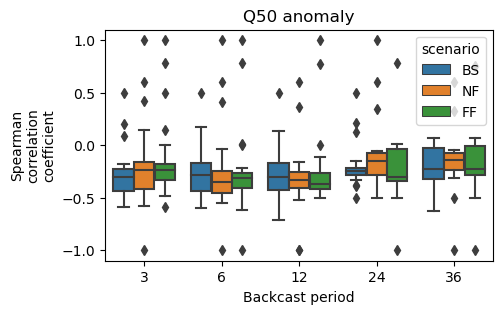

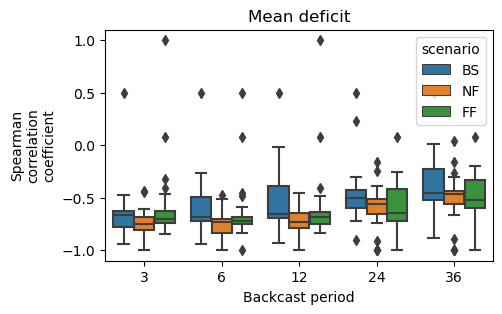

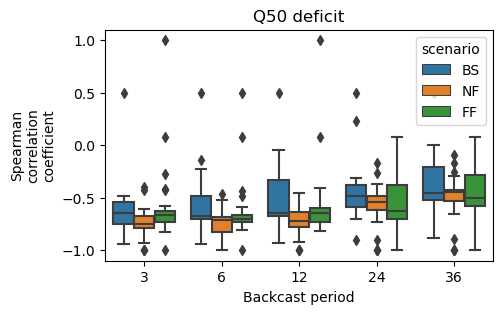

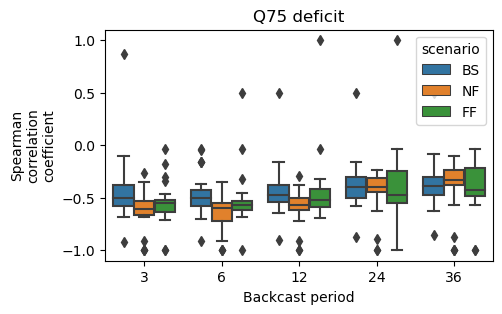

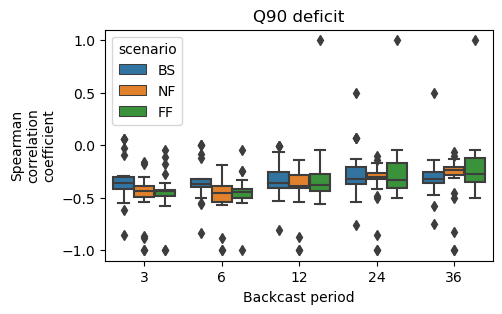

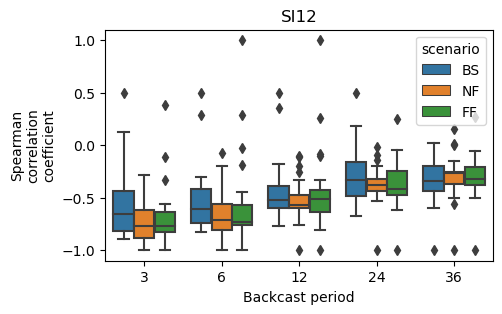

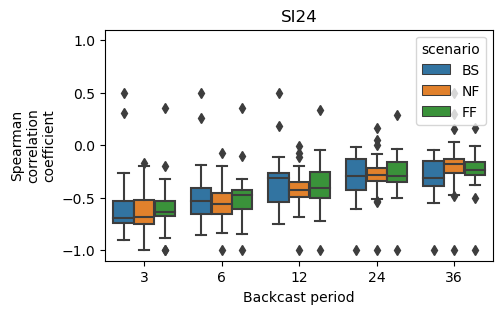

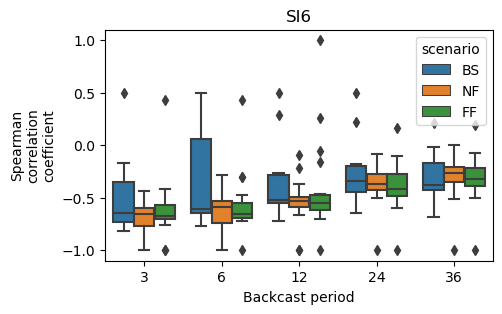

In [117]:
for indicator in [*corrs['indicator'].unique()]:

    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    corrs_sub = corrs[corrs['indicator'] == indicator] 
    corrs_sub['scenario'] = corrs_sub['scenario'].apply(lambda x: x.upper())
    sns.boxplot(x="backcast", y="r", hue="scenario", hue_order=['BS', 'NF', 'FF'], data=corrs_sub, ax=ax) 
    ax.set_ylabel('Spearman\ncorrelation\ncoefficient')
    ax.set_xlabel('Backcast period')
    ax.set_title(titles[indicator])
    ax.set_ylim([-1.1, 1.1])
    ax.set_yticks([-1, -.5, 0, .5, 1])
    fig.savefig(f'/Users/alison/Desktop/boxplots_{VAR}_{indicator}.png', bbox_inches='tight', dpi=300)